### Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Features of the Dataset

* dateCrawled: Date the car advertisement was crawled. (Date)
* name: Name of the car. (String)
* seller: Type of seller (private or dealer). (String)
* offerType: Type of offer (e.g. sale, repair, etc.). (String)
* price: Price of the car. (Integer)
* abtest: Test type (A or B). (String)
* vehicleType: Type of vehicle (e.g. SUV, sedan, etc.). (String)
* yearOfRegistration: Year the car was registered. (Integer)
* gearbox: Type of gearbox (manual or automatic). (String)
* powerPS: Power of the car in PS. (Integer)
* model: Model of the car. (String)
* kilometer: Kilometers the car has been driven. (Integer)
* monthOfRegistration: Month the car was registered. (Integer)
* fuelType: Type of fuel (e.g. diesel, petrol, etc.). (String)
* brand: Brand of the car. (String)
* notRepairedDamage: Whether or not the car has any damage that has not been repaired. (String)
* dateCreated: Date the car  advertisement was created. (Date)
* nrOfPictures: Number of pictures of the car. (Integer)
* postalCode: Postal code of the car. (Integer)
* lastSeen: Date the car was last seen. (Date)

In [2]:
# read the dataset using pandas
df=pd.read_csv('autos.csv',index_col='index')
df.head(5)

# to get first 5 columns

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
index,,,,,,,,,,,,,,,,,,,,
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.info()
# datatypes of the variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
df.select_dtypes(exclude=np.number)

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
index,,,,,,,,,,,,,
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,test,NaN,manuell,golf,benzin,volkswagen,NaN,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,test,coupe,manuell,NaN,diesel,audi,ja,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,test,suv,automatik,grand,diesel,jeep,NaN,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,test,kleinwagen,manuell,golf,benzin,volkswagen,nein,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,test,kleinwagen,manuell,fabia,diesel,skoda,nein,2016-03-31 00:00:00,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,test,NaN,NaN,NaN,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,test,cabrio,automatik,fortwo,benzin,smart,nein,2016-03-05 00:00:00,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,test,bus,manuell,transporter,diesel,volkswagen,nein,2016-03-19 00:00:00,2016-04-07 07:15:26


In [5]:
# checking for null values

df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [6]:
df['yearOfRegistration'].max()

9999

# EDA

In [7]:
# Pairplot

# sns.pairplot(df,diag_kind='kde')

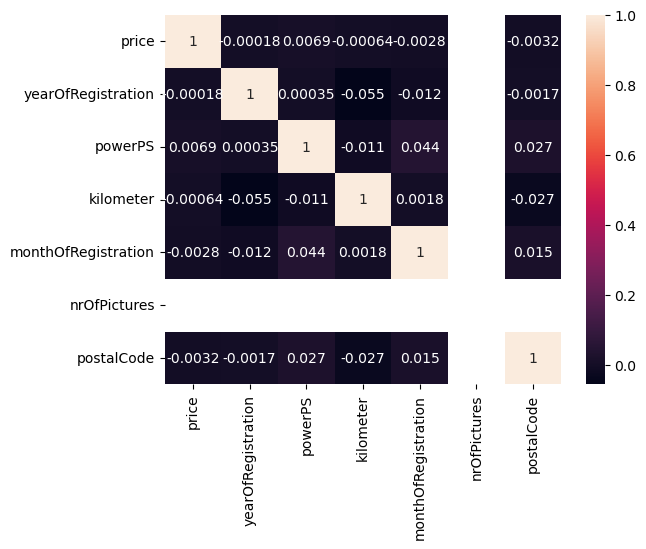

In [8]:
# Heatmap

sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
# The number of data in each category

df['vehicleType'].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [10]:
df['gearbox'].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [11]:
df['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [12]:
df['offerType'].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [13]:
df['abtest'].value_counts()

test       192585
control    178943
Name: abtest, dtype: int64

In [14]:
df['fuelType'].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [15]:
df['notRepairedDamage'].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [16]:
df['kilometer'].value_counts()

150000    240797
125000     38067
100000     15920
90000      12523
80000      11053
70000       9773
60000       8669
50000       7615
5000        7069
40000       6376
30000       6041
20000       5676
10000       1949
Name: kilometer, dtype: int64

# Replacing names in english

In [17]:
# making a copy of the data
df_1=df.copy()

df_1['fuelType']=df_1['fuelType'].replace(to_replace={'benzin':'gasoline','andere':'others','elektro':'electric'})
df_1['notRepairedDamage']=df_1['notRepairedDamage'].replace({'nein': 'no', 'ja': 'yes'})
df_1['offerType']=df_1['offerType'].replace({'Angebot':'proposal','Gesuch':'request'})
df_1['seller']=df_1['seller'].replace(to_replace={'gewerblich':'commercial','privat':'private'})
df_1['gearbox']=df_1['gearbox'].replace(to_replace={'manuell':'manual','automatik':'automatic'})
df_1.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
index,,,,,,,,,,,,,,,,,,,,
0,2016-03-24 11:52:17,Golf_3_1.6,private,proposal,480,test,NaN,1993,manual,0,golf,150000,0,gasoline,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,proposal,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,proposal,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,proposal,1500,test,kleinwagen,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,proposal,3600,test,kleinwagen,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [18]:
# checkign dtypes 

df_1.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

### 5 Point Summary

In [19]:
# for numerical columns
df_1.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [20]:
# categorical variables

df_1. describe(include = 'object')

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371528,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468,371528,371528
unique,280500,233531,2,2,2,8,2,251,7,40,2,114,182806
top,2016-03-24 14:49:47,Ford_Fiesta,private,proposal,test,limousine,manual,golf,gasoline,volkswagen,no,2016-04-03 00:00:00,2016-04-07 06:45:59
freq,7,657,371525,371516,192585,95894,274214,30070,223857,79640,263182,14450,17


In [21]:
#calculating the percentage of missing values

df_1.isna().sum().sort_values(ascending=False)*100/len(df_1)

notRepairedDamage      19.395577
vehicleType            10.192771
fuelType                8.986133
model                   5.513447
gearbox                 5.439429
kilometer               0.000000
postalCode              0.000000
nrOfPictures            0.000000
dateCreated             0.000000
brand                   0.000000
monthOfRegistration     0.000000
dateCrawled             0.000000
name                    0.000000
powerPS                 0.000000
yearOfRegistration      0.000000
abtest                  0.000000
price                   0.000000
offerType               0.000000
seller                  0.000000
lastSeen                0.000000
dtype: float64

In [22]:
df_1['notRepairedDamage'].value_counts()

no     263182
yes     36286
Name: notRepairedDamage, dtype: int64

In [23]:
# dropping the null values

df_1.dropna(inplace=True)

In [24]:
# checking null after treatment

df_1.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [25]:
df_1.shape

# new shape of the data

(260956, 20)

In [26]:
df_1[df_1['price']==0]
#there are rows where price = 0
#we do not consider to take those rows

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
index,,,,,,,,,,,,,,,,,,,,
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,private,proposal,0,test,limousine,1980,manual,50,andere,40000,7,gasoline,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
157,2016-03-11 18:55:53,Opel_meriva_1.6_16_v_lpg__z16xe_no_OPC,private,proposal,0,test,bus,2004,manual,101,meriva,150000,10,lpg,opel,yes,2016-03-11 00:00:00,0,27432,2016-03-12 23:47:10
604,2016-03-27 11:37:43,Bmw_e39_523i_5er_tausch_e38_7er_tauschen,private,proposal,0,test,limousine,1996,manual,170,5er,150000,0,gasoline,bmw,no,2016-03-27 00:00:00,0,48529,2016-03-27 11:37:43
642,2016-04-05 06:36:35,VW_Polo_Classis,private,proposal,0,test,limousine,1998,manual,75,polo,150000,0,gasoline,volkswagen,yes,2016-04-05 00:00:00,0,68766,2016-04-07 10:44:39
897,2016-03-09 08:53:31,Audi_a6_2.0_170_PS_2009_Unfall,private,proposal,0,test,kombi,2009,manual,170,a6,150000,1,diesel,audi,yes,2016-03-09 00:00:00,0,79822,2016-03-09 10:40:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371019,2016-03-27 21:38:25,VW_Polo_zu_Verkaufen,private,proposal,0,test,kleinwagen,1996,manual,45,polo,150000,8,gasoline,volkswagen,yes,2016-03-27 00:00:00,0,30926,2016-04-05 21:45:42
371081,2016-03-20 23:44:12,Golf_4_2_3l_V5,private,proposal,0,control,limousine,1999,manual,150,golf,125000,10,gasoline,volkswagen,no,2016-03-20 00:00:00,0,36304,2016-03-23 10:16:33
371134,2016-03-08 16:45:49,AUDI_100_2.3___TÜV_11.2017____VB,private,proposal,0,test,limousine,1991,manual,133,100,150000,6,gasoline,audi,no,2016-03-08 00:00:00,0,4319,2016-03-12 00:16:44


In [27]:
df_1.shape

(260956, 20)

In [28]:
#we remove all columns with price = 0
df_2=df_1[df_1['price']!=0]
df_2.shape

(257567, 20)

In [29]:
pd.set_option('display.max_columns',999)
df_2.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
index,,,,,,,,,,,,,,,,,,,,
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,proposal,1500,test,kleinwagen,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,proposal,3600,test,kleinwagen,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,private,proposal,650,test,limousine,1995,manual,102,3er,150000,10,gasoline,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,private,proposal,2200,test,cabrio,2004,manual,109,2_reihe,150000,8,gasoline,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,private,proposal,2000,control,limousine,2004,manual,105,3_reihe,150000,12,gasoline,mazda,no,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34


In [30]:
df_2[df_2['yearOfRegistration']>2023].shape
#there are 95 rows who's year of registration contains invalid data

(0, 20)

In [31]:
df_2=df_2[df_2['yearOfRegistration']<=2023]
df_2.shape

(257567, 20)

In [32]:
df_2['yearOfRegistration'].min()
#The first car was invented by Karl Benz in 1886.

1910

In [33]:
df_2=df_2[df_2['yearOfRegistration']>=1886]
df_2.shape

(257567, 20)

In [34]:
df_2['yearOfRegistration'].min()

1910

In [35]:
print(df_2['powerPS'].max(),',',df_2['powerPS'].min())

20000 , 0


In [36]:
#Compact car	50 HP
#Midsize car	100 HP
#Full-size car	150 HP
#SUV	200 HP
#Pickup truck	300 HP
#according to research the maximum power a car can have in today's world is 1600 which is held
#by bugatti chiron
#so we remove all columns where power = 50 and power > 1600

In [37]:
df_2=df_2[(df_2['powerPS']>=50)&(df_2['powerPS']<=1600)]
df_2.shape

(244952, 20)

In [38]:
df_2['yearOfRegistration'].min()

1931

In [39]:
# Feature Engineering

current=2023
# Filter the DataFrame based on the year range

df_2['Car_age']=current-df_2['yearOfRegistration']

In [40]:
df_2['Car_age'].max(), df_2['Car_age'].min()

(92, 5)

In [41]:
df_2.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,Car_age
index,,,,,,,,,,,,,,,,,,,,,
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,proposal,1500,test,kleinwagen,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,22
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,proposal,3600,test,kleinwagen,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,15
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,private,proposal,650,test,limousine,1995,manual,102,3er,150000,10,gasoline,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07,28
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,private,proposal,2200,test,cabrio,2004,manual,109,2_reihe,150000,8,gasoline,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39,19
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,private,proposal,2000,control,limousine,2004,manual,105,3_reihe,150000,12,gasoline,mazda,no,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34,19


In [42]:
#df_2['monthOfRegistration']=df_2['monthOfRegistration'].astype('object')

In [43]:
# Dropping the insignificant columns

df_2.drop(['nrOfPictures','postalCode','monthOfRegistration'],axis=1,inplace=True)

# nrOfPictures - all the values 0
# postalCode - irrelavent for predicting the price of the car
# monthOfRegistration - mot much help for interpreting price as we haev year of registration

In [44]:
df_2_num=df_2.select_dtypes(include=np.number)

In [45]:
df_2_num.head()
#we drop columns 'nrOfPictures' and 'postalCode'

,price,yearOfRegistration,powerPS,kilometer,Car_age
index,,,,,
3,1500,2001,75,150000,22
4,3600,2008,69,90000,15
5,650,1995,102,150000,28
6,2200,2004,109,150000,19
10,2000,2004,105,150000,19


### Boxplot

<Figure size 300x400 with 0 Axes>

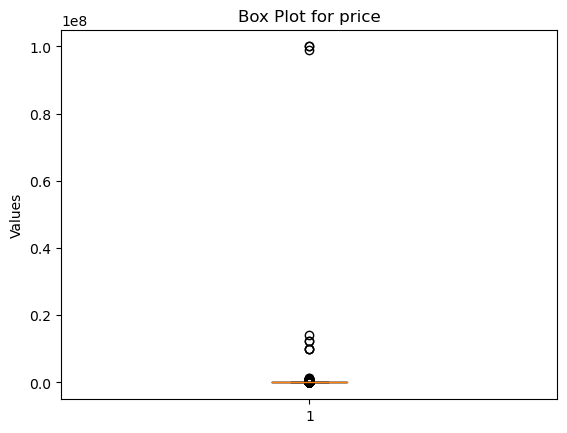

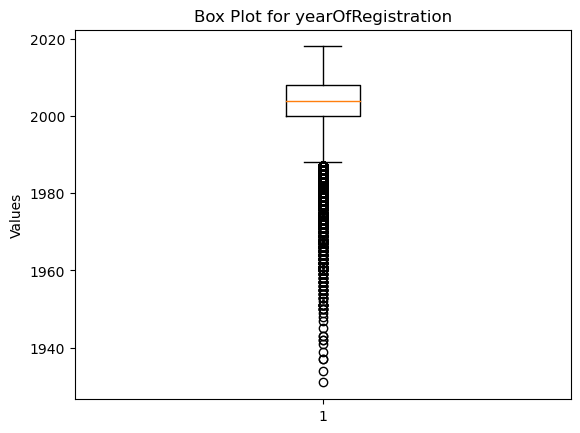

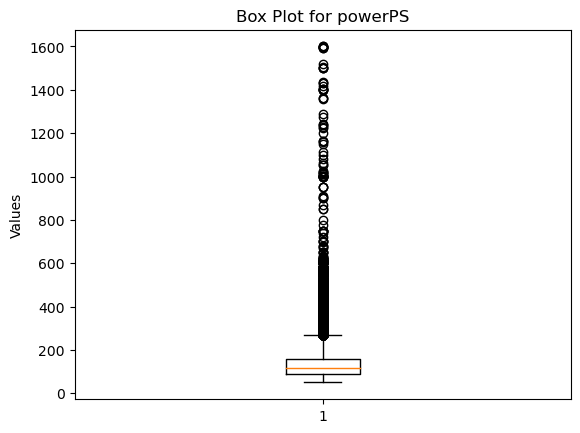

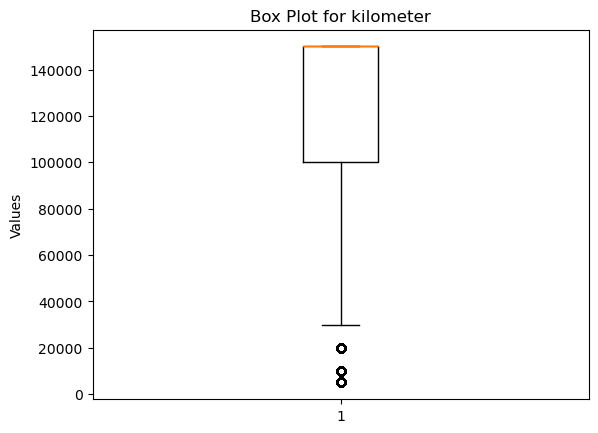

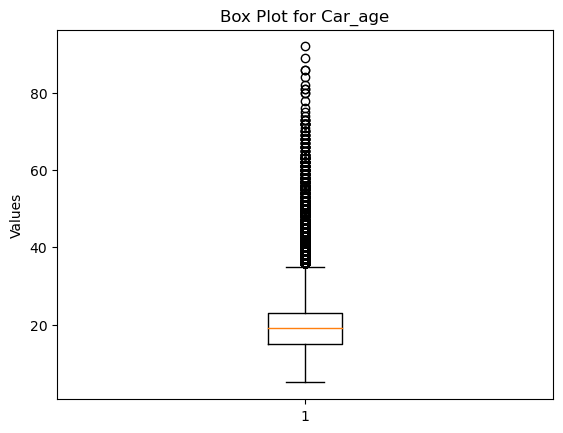

In [46]:
plt.figure(figsize=(3,4))

for column in df_2_num.columns:
    plt.figure()  # Create a new figure for each box plot
    plt.boxplot(df_2_num[column])
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

### Distplot

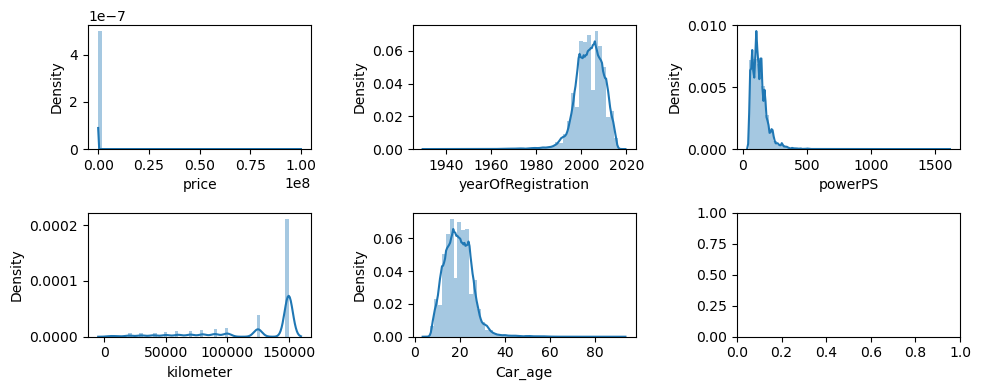

In [47]:
#create
fig,ax=plt.subplots(2,3,figsize=(10,4))

for col,subplot in zip(df_2_num,ax.flatten()):
    sns.distplot(df_2_num[col],kde=True,ax=subplot)
    
plt.tight_layout()
plt.show()

In [48]:
df_2.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated',
       'lastSeen', 'Car_age'],
      dtype='object')

In [49]:
#we try here to detect outliers using the dbscan method
#we do need to normalize the data before we implement dbscan

In [50]:
# selecting only the relavent variables

df_2_cat=df_2.select_dtypes(exclude=np.number)
df_cat=df_2_cat[['seller','offerType','abtest','vehicleType','gearbox','fuelType','brand','notRepairedDamage']]
df_cat.head()

,seller,offerType,abtest,vehicleType,gearbox,fuelType,brand,notRepairedDamage
index,,,,,,,,
3,private,proposal,test,kleinwagen,manual,gasoline,volkswagen,no
4,private,proposal,test,kleinwagen,manual,diesel,skoda,no
5,private,proposal,test,limousine,manual,gasoline,bmw,yes
6,private,proposal,test,cabrio,manual,gasoline,peugeot,no
10,private,proposal,control,limousine,manual,gasoline,mazda,no


In [51]:
df_fin=pd.concat([df_2_num,df_cat],axis=1)
df_fin.head()

,price,yearOfRegistration,powerPS,kilometer,Car_age,seller,offerType,abtest,vehicleType,gearbox,fuelType,brand,notRepairedDamage
index,,,,,,,,,,,,,
3,1500,2001,75,150000,22,private,proposal,test,kleinwagen,manual,gasoline,volkswagen,no
4,3600,2008,69,90000,15,private,proposal,test,kleinwagen,manual,diesel,skoda,no
5,650,1995,102,150000,28,private,proposal,test,limousine,manual,gasoline,bmw,yes
6,2200,2004,109,150000,19,private,proposal,test,cabrio,manual,gasoline,peugeot,no
10,2000,2004,105,150000,19,private,proposal,control,limousine,manual,gasoline,mazda,no


### Outliers using boxplot

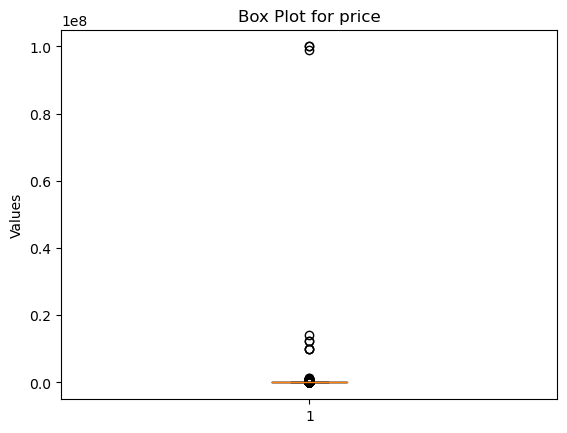

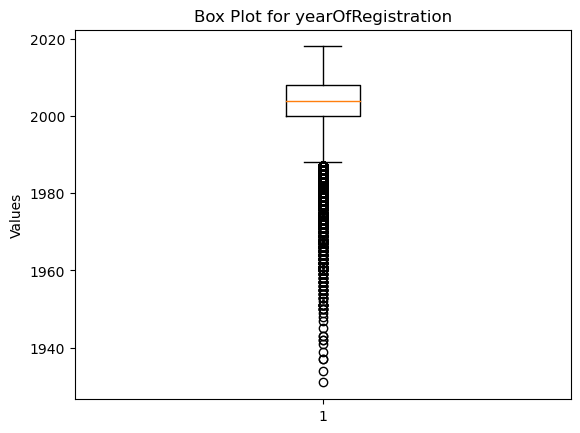

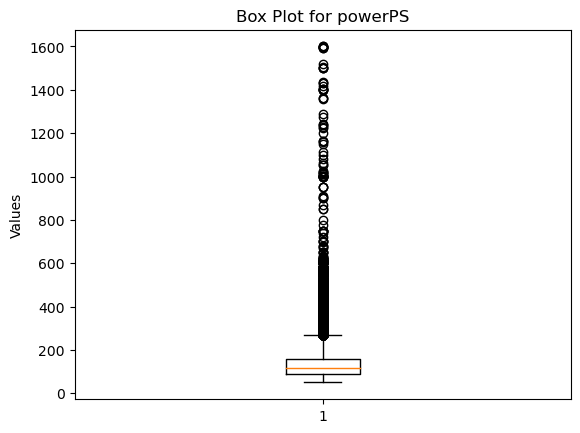

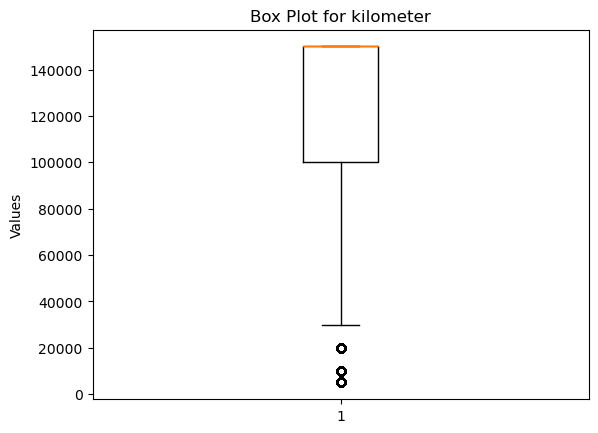

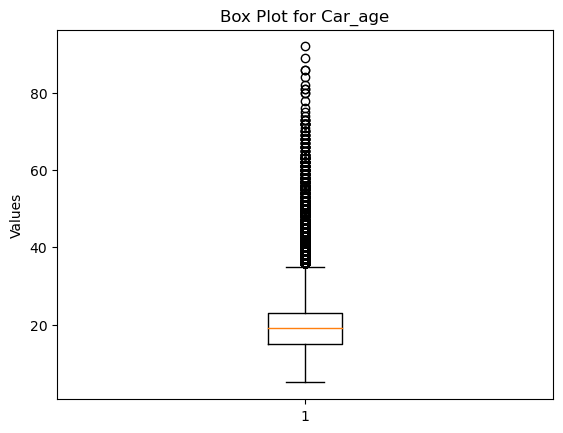

In [52]:
df_2_num = df_fin.select_dtypes(include = np.number)

for column in df_2_num.columns:
    plt.figure()  # Create a new figure for each box plot
    plt.boxplot(df_2_num[column])
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

In [53]:
# checking the skewness of the data

df_fin.skew()

price                 275.013830
yearOfRegistration     -1.110697
powerPS                 3.079743
kilometer              -1.345553
Car_age                 1.110697
dtype: float64

###  Outlier Treatment

In [54]:
q1=df_fin.quantile(0.25)
q3=df_fin.quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)

df_rem=df_fin[~((df_fin>ul)|(df_fin<ll)).any(axis=1)]
df_rem.shape

(217709, 13)

In [55]:
df_rem.skew()

price                 1.223923
yearOfRegistration   -0.252323
powerPS               0.634762
kilometer            -1.480627
Car_age               0.252323
dtype: float64

In [56]:
df_rem['seller'].value_counts()

private    217709
Name: seller, dtype: int64

### statistical tests

In [57]:
import scipy.stats as stats

In [58]:
df_rem['seller'].unique()
#since there is only one type of seller that is private we drop it

array(['private'], dtype=object)

In [59]:
df_rem.drop('seller',axis=1,inplace=True)

In [60]:
df_rem.head()

,price,yearOfRegistration,powerPS,kilometer,Car_age,offerType,abtest,vehicleType,gearbox,fuelType,brand,notRepairedDamage
index,,,,,,,,,,,,
3,1500,2001,75,150000,22,proposal,test,kleinwagen,manual,gasoline,volkswagen,no
4,3600,2008,69,90000,15,proposal,test,kleinwagen,manual,diesel,skoda,no
5,650,1995,102,150000,28,proposal,test,limousine,manual,gasoline,bmw,yes
6,2200,2004,109,150000,19,proposal,test,cabrio,manual,gasoline,peugeot,no
10,2000,2004,105,150000,19,proposal,control,limousine,manual,gasoline,mazda,no


In [61]:
from statsmodels.stats import weightstats as stests

In [62]:
# online_order

# H0: Not significant
# H1: Significant
# Alpha =0.05

group_a = df_rem[df_rem['offerType']=='proposal']['price']
group_b = df_rem[df_rem['offerType']=='request']['price']

t_statistic,p_value=stats.ttest_ind(group_a,group_b)

if p_value<0.05:
    print("P value",p_value)
    print("Reject H0")
else:
    print("P value",p_value)
    print("Retain H0")
    
print(t_statistic)

P value nan
Retain H0
nan


In [63]:
group_a

index
3         1500
4         3600
5          650
6         2200
10        2000
          ... 
371516    1490
371517    7900
371520    3200
371524    1199
371525    9200
Name: price, Length: 217708, dtype: int64

In [64]:
group_b

index
315232    1550
Name: price, dtype: int64

In [65]:
# online_order

# H0:Not significant
# H1: Significant
# Alpha =0.05

group_a = df_rem[df_rem['gearbox']=='manual']['price']
group_b = df_rem[df_rem['gearbox']=='automatic']['price']

t_statistic,p_value = stats.ttest_ind(group_a,group_b)

if p_value<0.05:
    print("P value",p_value)
    print("Reject H0")
else:
    print("P value",p_value)
    print("Retain H0")

P value 0.0
Reject H0


In [66]:
t_statistic, p_value

(-112.90037955784007, 0.0)

In [67]:
df['fuelType'].unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [68]:
#we want to check if variance of kilometers of manual and automatic cars are different

sample_manual= df_rem[df_rem['gearbox']=='manual']['kilometer']
sample_automatic= df_rem[df_rem['gearbox']=='automatic']['kilometer']

v1,v2=np.var(sample_manual),np.var(sample_automatic)
print(round(v1,2),round(v2,2))

#the variance of kilometers for manual is higher than that of automatic

1125907182.16 1069170426.28


In [69]:
#we want to find out if the prices for different car brands are the same or different

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod=ols('price~brand',data=df_rem).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

#we reject the null hypothesis infering that at least one of the price means of the 
#brands are different


                sum_sq        df          F  PR(>F)
brand     4.790792e+11      37.0  713.93292     0.0
Residual  3.947742e+12  217671.0        NaN     NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'volkswagen'),
  Text(1, 0, 'skoda'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'peugeot'),
  Text(4, 0, 'mazda'),
  Text(5, 0, 'nissan'),
  Text(6, 0, 'renault'),
  Text(7, 0, 'ford'),
  Text(8, 0, 'mercedes_benz'),
  Text(9, 0, 'seat'),
  Text(10, 0, 'honda'),
  Text(11, 0, 'fiat'),
  Text(12, 0, 'mini'),
  Text(13, 0, 'smart'),
  Text(14, 0, 'audi'),
  Text(15, 0, 'alfa_romeo'),
  Text(16, 0, 'subaru'),
  Text(17, 0, 'mitsubishi'),
  Text(18, 0, 'opel'),
  Text(19, 0, 'hyundai'),
  Text(20, 0, 'lancia'),
  Text(21, 0, 'citroen'),
  Text(22, 0, 'toyota'),
  Text(23, 0, 'kia'),
  Text(24, 0, 'chevrolet'),
  Text(25, 0, 'dacia'),
  Text(26, 0, 'suzuki'),
  Text(27, 0, 'daihatsu'),
  Text(28, 0, 'chrysler'),
  Text(29, 0, 'volvo'),
  Text(30, 0, 'jaguar'),
  Text(31, 0, 'rover'),
  Text(32, 0, 'porsche'),
 

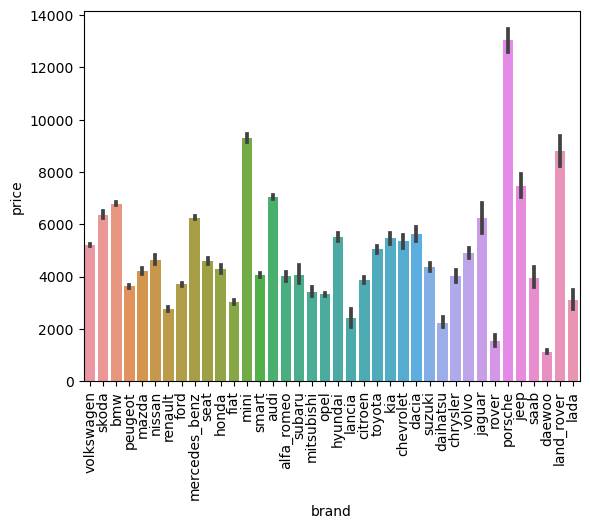

In [70]:
sns.barplot(data=df_rem,x='brand',y='price')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'volkswagen'),
  Text(1, 0, 'skoda'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'peugeot'),
  Text(4, 0, 'mazda'),
  Text(5, 0, 'nissan'),
  Text(6, 0, 'renault'),
  Text(7, 0, 'ford'),
  Text(8, 0, 'mercedes_benz'),
  Text(9, 0, 'seat'),
  Text(10, 0, 'honda'),
  Text(11, 0, 'fiat'),
  Text(12, 0, 'mini'),
  Text(13, 0, 'smart'),
  Text(14, 0, 'audi'),
  Text(15, 0, 'alfa_romeo'),
  Text(16, 0, 'subaru'),
  Text(17, 0, 'mitsubishi'),
  Text(18, 0, 'opel'),
  Text(19, 0, 'hyundai'),
  Text(20, 0, 'lancia'),
  Text(21, 0, 'citroen'),
  Text(22, 0, 'toyota'),
  Text(23, 0, 'kia'),
  Text(24, 0, 'chevrolet'),
  Text(25, 0, 'dacia'),
  Text(26, 0, 'suzuki'),
  Text(27, 0, 'daihatsu'),
  Text(28, 0, 'chrysler'),
  Text(29, 0, 'volvo'),
  Text(30, 0, 'jaguar'),
  Text(31, 0, 'rover'),
  Text(32, 0, 'porsche'),
 

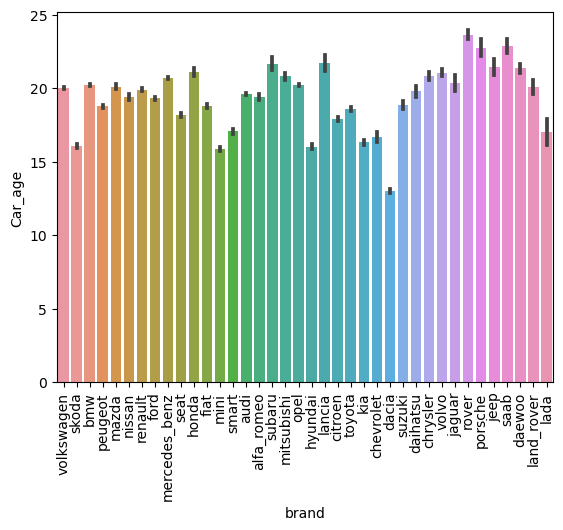

In [71]:
sns.barplot(data=df_rem,x='brand',y='Car_age')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'volkswagen'),
  Text(1, 0, 'skoda'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'peugeot'),
  Text(4, 0, 'mazda'),
  Text(5, 0, 'nissan'),
  Text(6, 0, 'renault'),
  Text(7, 0, 'ford'),
  Text(8, 0, 'mercedes_benz'),
  Text(9, 0, 'seat'),
  Text(10, 0, 'honda'),
  Text(11, 0, 'fiat'),
  Text(12, 0, 'mini'),
  Text(13, 0, 'smart'),
  Text(14, 0, 'audi'),
  Text(15, 0, 'alfa_romeo'),
  Text(16, 0, 'subaru'),
  Text(17, 0, 'mitsubishi'),
  Text(18, 0, 'opel'),
  Text(19, 0, 'hyundai'),
  Text(20, 0, 'lancia'),
  Text(21, 0, 'citroen'),
  Text(22, 0, 'toyota'),
  Text(23, 0, 'kia'),
  Text(24, 0, 'chevrolet'),
  Text(25, 0, 'dacia'),
  Text(26, 0, 'suzuki'),
  Text(27, 0, 'daihatsu'),
  Text(28, 0, 'chrysler'),
  Text(29, 0, 'volvo'),
  Text(30, 0, 'jaguar'),
  Text(31, 0, 'rover'),
  Text(32, 0, 'porsche'),
 

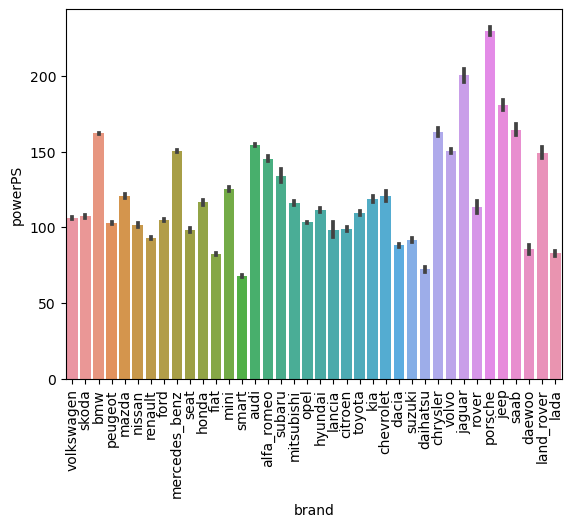

In [72]:
sns.barplot(data=df_rem,x='brand',y='powerPS')
plt.xticks(rotation=90)

In [73]:
df_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217709 entries, 3 to 371525
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               217709 non-null  int64 
 1   yearOfRegistration  217709 non-null  int64 
 2   powerPS             217709 non-null  int64 
 3   kilometer           217709 non-null  int64 
 4   Car_age             217709 non-null  int64 
 5   offerType           217709 non-null  object
 6   abtest              217709 non-null  object
 7   vehicleType         217709 non-null  object
 8   gearbox             217709 non-null  object
 9   fuelType            217709 non-null  object
 10  brand               217709 non-null  object
 11  notRepairedDamage   217709 non-null  object
dtypes: int64(5), object(7)
memory usage: 21.6+ MB


In [74]:
df_rem.drop('yearOfRegistration',axis=1,inplace=True)
cols=df_rem.select_dtypes(include=np.number).columns

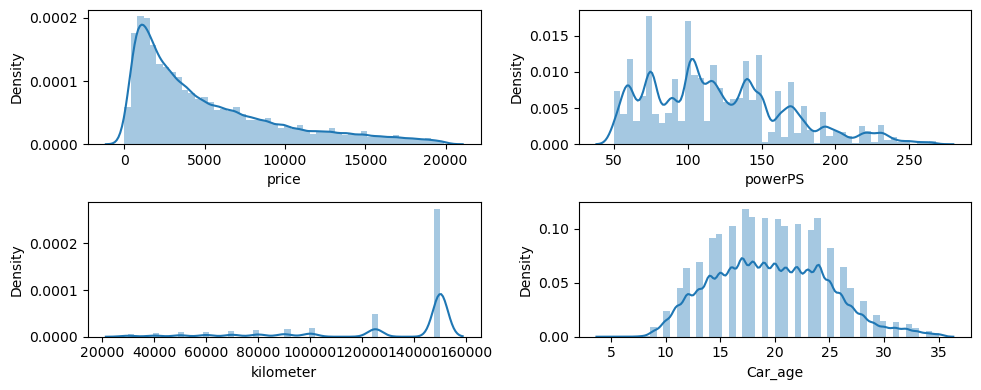

In [75]:
#create
fig,ax=plt.subplots(2,2,figsize=(10,4))

for col,subplot in zip(cols,ax.flatten()):
    sns.distplot(df_rem[col],kde=True,ax=subplot)
    
plt.tight_layout()
plt.show()

In [76]:
df_rem.min()

price                         1
powerPS                      50
kilometer                 30000
Car_age                       5
offerType              proposal
abtest                  control
vehicleType              andere
gearbox               automatic
fuelType                    cng
brand                alfa_romeo
notRepairedDamage            no
dtype: object

### Transformation

In [77]:
from sklearn.preprocessing import PowerTransformer

df_numerical=df_rem.select_dtypes(include=np.number)
pt=PowerTransformer(method='yeo-johnson')
df_transformed=pd.DataFrame(pt.fit_transform(df_numerical),columns=df_numerical.columns, index =df_numerical.index )
df_transformed.head()

,price,powerPS,kilometer,Car_age
index,,,,
3,-0.805802,-1.041791,0.688702,0.501919
4,-0.001518,-1.243704,-1.544705,-0.879621
5,-1.449251,-0.274169,0.688702,1.526674
6,-0.471788,-0.103645,0.688702,-0.060344
10,-0.557399,-0.199910,0.688702,-0.060344


In [78]:
df_transformed.shape

(217709, 4)

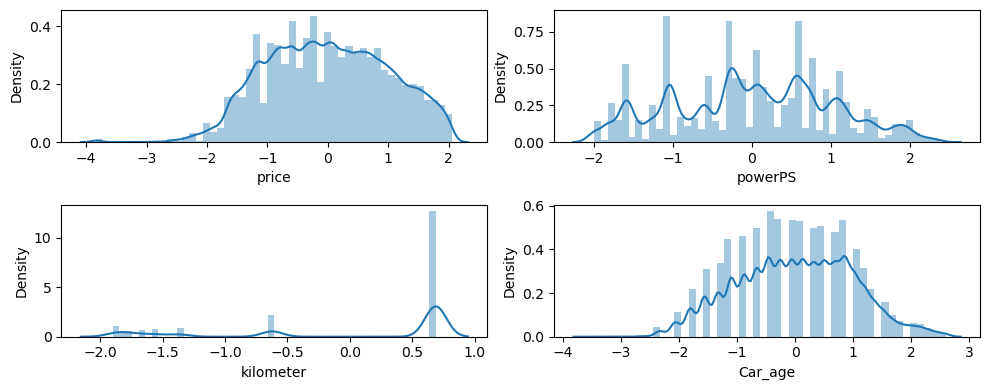

In [79]:
# distribution of the data after tranforming the data

cols=df_numerical.select_dtypes(include=np.number).columns

fig,ax=plt.subplots(2,2,figsize=(10,4))

for col,subplot in zip(cols,ax.flatten()):
    sns.distplot(df_transformed[col],kde=True,ax=subplot)
    
plt.tight_layout()
plt.show()

In [80]:
df_rem_cat=df_rem.select_dtypes(exclude=np.number)
df_rem_cat.head()

,offerType,abtest,vehicleType,gearbox,fuelType,brand,notRepairedDamage
index,,,,,,,
3,proposal,test,kleinwagen,manual,gasoline,volkswagen,no
4,proposal,test,kleinwagen,manual,diesel,skoda,no
5,proposal,test,limousine,manual,gasoline,bmw,yes
6,proposal,test,cabrio,manual,gasoline,peugeot,no
10,proposal,control,limousine,manual,gasoline,mazda,no


In [81]:
df_rem_cat=df_rem_cat.reset_index()

In [82]:
df_transformed=df_transformed.reset_index()

In [83]:
df_final_transformed=pd.merge(left=df_transformed,right=df_rem_cat,on='index',how='inner')
df_final_transformed.drop('brand',axis=1,inplace=True)
df_final_transformed.head()

,index,price,powerPS,kilometer,Car_age,offerType,abtest,vehicleType,gearbox,fuelType,notRepairedDamage
0,3,-0.805802,-1.041791,0.688702,0.501919,proposal,test,kleinwagen,manual,gasoline,no
1,4,-0.001518,-1.243704,-1.544705,-0.879621,proposal,test,kleinwagen,manual,diesel,no
2,5,-1.449251,-0.274169,0.688702,1.526674,proposal,test,limousine,manual,gasoline,yes
3,6,-0.471788,-0.103645,0.688702,-0.060344,proposal,test,cabrio,manual,gasoline,no
4,10,-0.557399,-0.199910,0.688702,-0.060344,proposal,control,limousine,manual,gasoline,no


In [84]:
df_final_transformed.drop('index',axis=1,inplace=True)

In [85]:
df_final_transformed.head()

,price,powerPS,kilometer,Car_age,offerType,abtest,vehicleType,gearbox,fuelType,notRepairedDamage
0,-0.805802,-1.041791,0.688702,0.501919,proposal,test,kleinwagen,manual,gasoline,no
1,-0.001518,-1.243704,-1.544705,-0.879621,proposal,test,kleinwagen,manual,diesel,no
2,-1.449251,-0.274169,0.688702,1.526674,proposal,test,limousine,manual,gasoline,yes
3,-0.471788,-0.103645,0.688702,-0.060344,proposal,test,cabrio,manual,gasoline,no
4,-0.557399,-0.199910,0.688702,-0.060344,proposal,control,limousine,manual,gasoline,no


In [86]:
df_final_transformed_encoded=pd.get_dummies(df_final_transformed,drop_first=True)
df_final_transformed_encoded.head()

,price,powerPS,kilometer,Car_age,offerType_request,abtest_test,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,gearbox_manual,fuelType_diesel,fuelType_electric,fuelType_gasoline,fuelType_hybrid,fuelType_lpg,fuelType_others,notRepairedDamage_yes
0,-0.805802,-1.041791,0.688702,0.501919,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,-0.001518,-1.243704,-1.544705,-0.879621,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
2,-1.449251,-0.274169,0.688702,1.526674,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
3,-0.471788,-0.103645,0.688702,-0.060344,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,-0.557399,-0.199910,0.688702,-0.060344,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0


In [87]:
df_final_transformed_encoded.shape

(217709, 21)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,train_test_split

### Train- Test Split

In [89]:
X=df_final_transformed_encoded.drop('price',axis=1)
y=df_final_transformed_encoded['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [90]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((163281, 20), (54428, 20), (163281,), (54428,))

### Base model

In [91]:
import statsmodels.api as sm
model=sm.OLS(y_train,sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 2.811e+04
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:34:31   Log-Likelihood:            -1.1007e+05
No. Observations:              163281   AIC:                         2.202e+05
Df Residuals:                  163260   BIC:                         2.204e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1178      0.031      3.755      0.000       0.056       0.179
powerPS                    0.3702      0.002    218.307      0.000       0.367       0.374
kilometer                 -0.1765      0.001   -117.862      0.000      -0.179      -0.174
Car_age                   -0.5293      0.002   -337.139      0.000      -0.532      -0.526
offerType_request         -0.1682      0.475     -0.354      0.723      -1.099       0.763
abtest_test             3.742e-05      0.002      0.016      0.987      -0.005       0.005
vehicleType_bus            0.0178      0.016      1.144      0.253      -0.013       0.048
vehicleType_cabrio         0.3532      0.016     22.178      0.000       0.322       0.384
vehicleType_coupe          0.0878      0.016      5.402      0.000       0.056       0.120
vehicleType_kleinwagen    -0.0929      0.015     -6.014      0.000      -0.123      -0.063
vehicleType_kombi         -0.1755      0.015    -11.403      0.000      -0.206      -0.145
vehicleType_limousine     -0.0386      0.015     -2.516      0.012      -0.069      -0.009
vehicleType_suv            0.1768      0.016     10.777      0.000       0.145       0.209
gearbox_manual            -0.0876      0.003    -27.156      0.000      -0.094      -0.081
fuelType_diesel            0.2071      0.027      7.545      0.000       0.153       0.261
fuelType_electric          0.3499      0.126      2.785      0.005       0.104       0.596
fuelType_gasoline         -0.0353      0.027     -1.284      0.199      -0.089       0.019
fuelType_hybrid            0.2239      0.053      4.237      0.000       0.120       0.327
fuelType_lpg              -0.0388      0.029     -1.336      0.182      -0.096       0.018
fuelType_others            0.1129      0.126      0.899      0.369      -0.133       0.359
notRepairedDamage_yes     -0.5499      0.004   -141.772      0.000      -0.558      -0.542
==============================================================================
Omnibus:                    25589.936   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291589.658
Skew:                          -0.395   Prob(JB):                         0.00
Kurtosis:                       9.499   Cond. No.                         672.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Homoskadasticity

# H0: Homoskadastic
# H1: Hetroskadastic
het_breuschpagan(model.resid, sm.add_constant(X_train))

# The data is not homoscadastic

(5476.311785360326, 0.0, 283.2814006329957, 0.0)

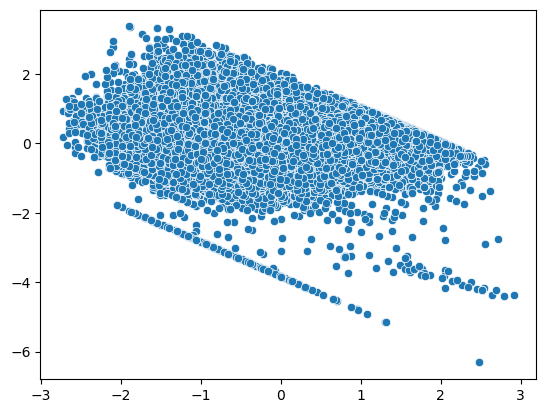

In [93]:
sns.scatterplot(x=model.fittedvalues,y=model.resid)
plt.show()

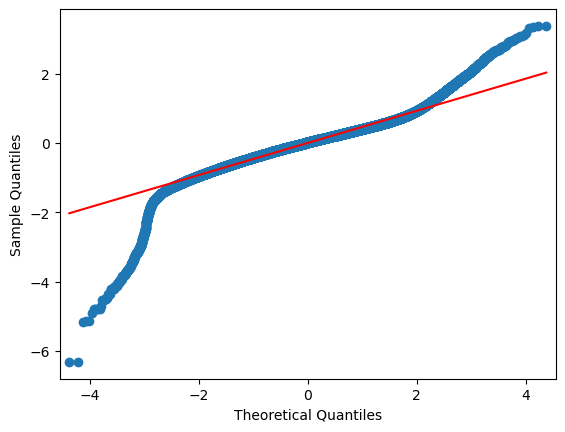

In [94]:
# Checking if the error terms are noramlly distributed
from statsmodels.graphics.gofplots import qqplot

qqplot(model.resid, line = 'r')
plt.show()

In [95]:
# The blue doted line has a deviation from the red line, which shows that the error terms are noramlly distributed

In [96]:
perf_score = pd.DataFrame(columns=['Model', 'Alpha', 'L1_Ratio','R2_Train','R2_Test','RMSE Train','RMSE TEST','MAPE' ] )

def per_measures(model):

   #-----------------------------------------------#
   # Calculation of R square and Adj R2            #
   #-----------------------------------------------#

   # calculate rsquare value

    rsq_train = model.score(X_train, y_train)
    rsq_test  = model.score(X_test, y_test)

    # calculating adjusted rsquare value
    n =X_train.shape[0]
    k = X_train.shape[1]
    rsq_adj = 1 - ((1-rsq_test)*(n-1)/(n-k-1))


   #-----------------------------------------------#
   # Model getting trained                         #
   #-----------------------------------------------#

    model.fit(X_train,y_train)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

   #-----------------------------------------------#
   # Calculation of RMSE and MAPE                  #
   #-----------------------------------------------#

    rmse_train =np.sqrt(mean_squared_error(y_train,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(y_test,pred_test))


    MAPE_test = (np.mean(np.abs((y_test - pred_test) / y_test)) * 100)


    return (rsq_train,rsq_test,rmse_train,rmse_test,MAPE_test)

In [97]:
def update_performance (name, model, alpha = '-', l1_ratio = '-' ):


    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'          : name,
                                    'Alpha'          : alpha,
                                    'L1_Ratio'       : l1_ratio,
                                    'R2_Train'       : per_measures(model)[0],
                                    'R2_Test'        : per_measures(model)[1],    
                                    'RMSE Train'     : per_measures(model)[2],
                                    'RMSE TEST'      : per_measures(model)[3],
                                    'MAPE'           : per_measures(model)[4]
                                    },
                                   ignore_index = True)
    
    # the [1],[2] .... is coming from the user defined functon made above
    # in return R2_Train is at index 0 , so we are giving [0]
    # R2_Test is at index 1, so [1]

## Linear Regression

In [98]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [99]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [100]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print(lr.score(X_test,y_test))

print('rmse train',np.sqrt(mean_squared_error(y_train,pred_train)) )
print('rmse test',np.sqrt(mean_squared_error(y_test,pred_test))) 

0.7747945924254134
rmse train 0.4748101482468687
rmse test 0.47320908394379824


In [101]:
update_performance(name = 'Linear Regression ', model = lr)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.774981,0.774795,0.47481,0.473209,191.319355


## SequentialFeatureSelection

In [102]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

lr =LinearRegression()

selector = sfs(estimator = lr,k_features ='best',forward= True, scoring ='r2' )

# getting the feature names

selector.fit(X_train,y_train)
features = list(selector.k_feature_names_)
features


['powerPS',
 'kilometer',
 'Car_age',
 'vehicleType_bus',
 'vehicleType_cabrio',
 'vehicleType_coupe',
 'vehicleType_kleinwagen',
 'vehicleType_kombi',
 'vehicleType_limousine',
 'vehicleType_suv',
 'gearbox_manual',
 'fuelType_diesel',
 'fuelType_electric',
 'fuelType_hybrid',
 'fuelType_others',
 'notRepairedDamage_yes']

In [103]:
lr = LinearRegression()
lr.fit(X_train[features],y_train)
ypred = lr.predict(X_train[features])

from sklearn.metrics import r2_score, mean_squared_error

# R square value, which we get in OLS model also
print(r2_score(y_train,ypred))

0.7749781396479837


In [104]:
# update_performance(name = 'Linear Regression- sfs(best)', model = lr)

# perf_score

# Random Forest Regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
rf = RandomForestRegressor()

rf_model = rf.fit(X_train,y_train)

pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

print(rf.score(X_test, y_test))

0.8347813523479196


In [106]:
print(np.sqrt(mean_squared_error(y_test, pred_test)))
print(np.sqrt(mean_squared_error(y_train, pred_train)))

0.40531548598127015
0.3000134093438297


In [107]:
update_performance(name = 'Random Forest ', model = rf_model)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.774981,0.774795,0.47481,0.473209,191.319355
1,Random Forest,-,-,0.910162,0.834759,0.30008,0.404643,173.860982


# Decision Tree Regressor

In [108]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

model_dt=dt.fit(X_train,y_train)

pred_train = model_dt.predict(X_train)
pred_test = model_dt.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred_test)))
print(np.sqrt(mean_squared_error(y_train, pred_train)))

0.453328223529479
0.2878309145087376


In [109]:
model_dt.score(X_test, y_test)

0.7933201272926759

In [110]:
update_performance(name = 'Desision Tree', model = model_dt)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.774981,0.774795,0.474810,0.473209,191.319355
1,Random Forest,-,-,0.910162,0.834759,0.300080,0.404643,173.860982
2,Desision Tree,-,-,0.917310,0.794024,0.287831,0.453606,184.057547


In [111]:
# grid search cv

from sklearn.model_selection import GridSearchCV
regressor = DecisionTreeRegressor()

# Define hyperparameters to tune
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [112]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth= 10, min_samples_leaf=4, min_samples_split= 10, random_state =1)

model_dt_p = dt.fit(X_train, y_train)

ypred= model_dt_p.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, ypred)))
print(rf.score(X_test, y_test))

0.4314311534923846
0.8348726294784357


In [113]:
update_performance(name = 'Desision Tree- Hyperparameter', model = model_dt_p)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.774981,0.774795,0.474810,0.473209,191.319355
1,Random Forest,-,-,0.910162,0.834759,0.300080,0.404643,173.860982
2,Desision Tree,-,-,0.917310,0.794024,0.287831,0.453606,184.057547
3,Desision Tree- Hyperparameter,-,-,0.821829,0.812804,0.422502,0.431431,189.201901


# Gradient Boosting Regressor

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
model_gbr=gbr.fit(X_train,y_train)

pred_train = model_gbr.predict(X_train)
pred_test = model_gbr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred_test)))
print(np.sqrt(mean_squared_error(y_train, pred_train)))

0.4260562376970876
0.4261501934493429


In [115]:
model_gbr.score(X_test, y_test)

0.8174396227343556

In [116]:
update_performance(name = 'Gradient Boosting Regressor ', model = model_gbr)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.774981,0.774795,0.474810,0.473209,191.319355
1,Random Forest,-,-,0.910162,0.834759,0.300080,0.404643,173.860982
2,Desision Tree,-,-,0.917310,0.794024,0.287831,0.453606,184.057547
3,Desision Tree- Hyperparameter,-,-,0.821829,0.812804,0.422502,0.431431,189.201901
4,Gradient Boosting Regressor,-,-,0.818739,0.817440,0.426150,0.426056,185.129450


# XGBooster

In [117]:
from xgboost import XGBRegressor 

xg = XGBRegressor()
model_xg = xg.fit(X_train,y_train)

pred_train = model_xg.predict(X_train)
pred_test = model_xg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred_test)))
print(np.sqrt(mean_squared_error(y_train, pred_train)))

0.3939648719369474
0.38199036291741867


In [118]:
model_xg.score(X_test,y_test)

0.8439054760690151

In [119]:
update_performance(name = 'XGB ', model = model_xg)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.774981,0.774795,0.474810,0.473209,191.319355
1,Random Forest,-,-,0.910162,0.834759,0.300080,0.404643,173.860982
2,Desision Tree,-,-,0.917310,0.794024,0.287831,0.453606,184.057547
3,Desision Tree- Hyperparameter,-,-,0.821829,0.812804,0.422502,0.431431,189.201901
4,Gradient Boosting Regressor,-,-,0.818739,0.817440,0.426150,0.426056,185.129450
5,XGB,-,-,0.854359,0.843905,0.381990,0.393965,170.308896


# Support Vector Regression

In [ ]:
from sklearn.svm import SVR

sv = SVR()
model_sv = sv.fit(X_train,y_train)

pred_train = model_sv.predict(X_train)
pred_test = model_sv.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred_test)))
print(np.sqrt(mean_squared_error(y_train, pred_train)))

In [ ]:
model_sv.score(X_test, y_test)

In [ ]:
update_performance(name = 'Support Vector ', model = model_sv)

perf_score